<h1>Veritas</h1>
<h4>Works like ChipChat, AutoChip, Verigen and others have shown that LLMs can be used for verilog code generation. But it is often seen that the code generated by the LLM end up having issues like syntax errors and incorrect logic. To analyse the correctness of the code an expert's supervision is often required. Exhaustive test-cases are written to verify and test the logic. In veritas we integrate the verification and testing phase with the generation phase itself. We leverage the power of LLMs to understand initial simple contexts and generate complex outputs based on that. Each circuit is a combination of some logics like AND, NAND, NOR, XNOR etc. Each of these logics have an equivalent Conjunctive Normal Form (CNF) representation (refer figure below). A full circuit can be represented as the conjunction of CNF clauses representing the individual logic gates in the circuit. Our Veritas framework starts with CNF generation for simple circuits and used the generated result as future context to generate bigger and more complex circuits.</h4>



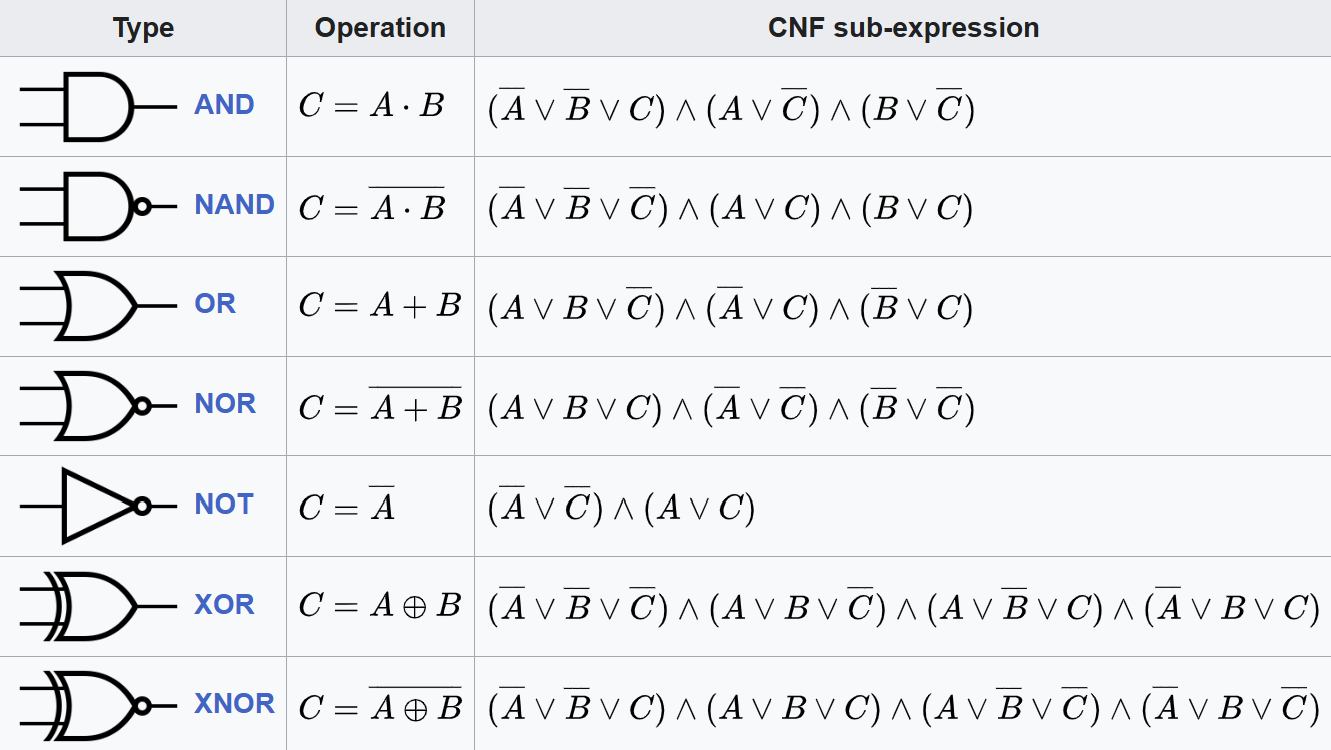

<h4>Veritas generates correct CNF equations for various designs like adder, subtractor, multiplexer, multiplicator, decoder.
Veritas leverages the idea that correct CNF can always be converted to correct verilog code that does not require further testing.</h4>
    Design Name :  Possible configuration

    "adder":       ["1-bit", "2-bit", "3-bit", "4-bit", "5-bit"]
    "subtractor":  ["1-bit", "2-bit", "3-bit", "4-bit", "5-bit"]
    "multiplier":  ["1-bit", "2-bit", "3-bit"]
    "decoder":     ["1x2", "2x4", "3x8", "4x16", "5x32"]
    "multiplexer": ["2x1", "4x1", "8x1", "16x1", "32x1"]


In [ ]:
API_KEY = "your api key"


In [ ]:
DESIGN = "adder"
TYP = "3-bit"

<h4>This part of the code enquires gpt-5-mini model incrementally to get the correct CNF equation for a design. This might take a couple of minutes due to multiple communication with the LLM. the idea is to first obtain the cnf for the smallest version of the design. Then asking the LLM to use it as reference to come up with bigger and more complex designs.</h4>

In [ ]:
from __future__ import annotations
import argparse
import os
import re
import sys
from typing import Dict, List
from openai import OpenAI
import logging
#import os
import time

# -----------------------------
# Dispatch stubs (plug your logic here)
# -----------------------------
def run_adder(typ, client) :
    # bit_str like "1-bit", "2-bit", ...
    print(f"[adder] type={typ}")
    # TODO: implement CNF/Verilog/etc.
    # print(generate_adder_cnf(bitwidth))
    reply = ""
    if typ == "1-bit" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",


        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit full adder. Assume inputs A, B, Cin and outputs S (sum) and Cout (carry-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Cout "}
        ]


        )

        last_reply = response.choices[0].message.content
        reply = last_reply


    elif typ == "2-bit" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",

        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit full adder. Assume inputs A, B, Cin and outputs S (sum) and Cout (carry-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Cout "}
        ]


        )

        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit adder, construct a 2-bit adder. The equation of 1-bit adder is :"+last_reply+". Just return the CNF equations."}
        ]
        )
        last_reply_2 = response.choices[0].message.content
        reply = last_reply_2
    else :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",

        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a "+typ+" full adder. Assume inputs A, B, Cin and outputs S (sum) and Cout (carry-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Cout "}
        ]


        )

        last_reply = response.choices[0].message.content
        print(last_reply)
        print("=================================")

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit adder, construct a 2-bit adder. The equation of 1-bit adder is :"+last_reply+". Just return the CNF equations as <output> = <CNF equation>."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)
        print("=================================")

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit adder: "+last_reply+" and the equation of a 2-bit adder: "+last_reply_2+". Construct a "+typ+" adder. Just return the CNF equations  as <output> = <CNF equation>."}
        ]
        )

        last_reply_3 = response.choices[0].message.content
        print(last_reply_3)
        print("=================================")
        reply = last_reply_3
    return reply


def run_subtractor(typ, client) :
    print(f"[subtractor] type={typ}")

    reply = ""
    if typ == "1-bit" :

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a "+typ+" full subtractor. Assume inputs A, B, Din and outputs S (difference) and Dout (borrow-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Dout "}
        ]
        )

        last_reply = response.choices[0].message.content
        print(last_reply)
        reply = last_reply


    elif typ == "2-bit" :

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit full subtractor. Assume inputs A, B, Din and outputs S (difference) and Dout (borrow-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Dout "}
        ]
        )

        last_reply = response.choices[0].message.content
        print(last_reply)

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit subtractor, construct a "+typ+" subtractor. The equation of 1-bit subtractor is :"+last_reply+". Just return the CNF equations for S0, S1, D0, D1."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)
        reply = last_reply_2

    else :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit full subtractor. Assume inputs A, B, Din and outputs S (difference) and Dout (borrow-out). Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for S and Dout "}
        ]
        )

        last_reply = response.choices[0].message.content
        print(last_reply)

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit subtractor, construct a 2-bit subtractor. The equation of 1-bit subtractor is :"+last_reply+". Just return the CNF equations for S0, S1, D0, D1."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit subtractor: "+last_reply+" and the equation of a 2-bit subtractor: "+last_reply_2+". Construct a "+typ+" subtractor. Just return the CNF equations."}
        ]
        )

        last_reply_3 = response.choices[0].message.content
        print(last_reply_3)
        reply = last_reply_3
    return reply



def run_multiplier(typ, client) :
    print(f"[multiplier] type={typ}")

    reply = ""
    if typ == "1-bit" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a "+typ+" multiplier. Assume input A, B and output Y0. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y0 = ... '"}
        ]
        )

        last_reply = response.choices[0].message.content
        reply = last_reply

    elif typ == "2-bit" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit multiplier. Assume input A, B and output Y0. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y0 = ... '"}
        ]
        )

        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit multiplier, construct a "+typ+" multiplier. The equation of 1-bit multiplier is :"+last_reply+". Split the equations in product and carry format. Just return the CNF equations for all the outputs in the form <output> = <equation>."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)

        reply = last_reply_2

    else :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1-bit multiplier. Assume input A, B and output Y0. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y0 = ... '"}
        ]
        )

        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit multiplier, construct a 2-bit multiplier. The equation of 1-bit multiplier is :"+last_reply+". Split the equations in product and carry format. Just return the CNF equations for all the outputs in the form <output> = <equation>."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1-bit multiplier: "+last_reply+" and the equation of a 2-bit multiplier: "+last_reply_2+". Construct a "+typ+" multiplier. Split the equations in product and carry format. Just return the CNF equation for all outputs in the form <output> = <equation>."}
        ]
        )
        last_reply_3 = response.choices[0].message.content
        print(last_reply_3)
        reply = last_reply_3
    return reply

def run_decoder(typ, client) :
    print(f"[decoder] type={typ}")

    reply = ""
    if typ == "1x2" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1x2 decoder. Assume input A and output Y1,Y2. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y1 = ... <empty line> Y2 = ...'"}
        ]
        )
        last_reply = response.choices[0].message.content
        reply = last_reply

    elif typ == "2x4" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1x2 decoder. Assume input A and output Y1,Y2. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y1 = ... <empty line> Y2 = ...'"}
        ]
        )
        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1x2 decoder, construct a 2x4 decoder. The equation of 1x2 decoder is :"+last_reply+". Just return the CNF equations for all the outputs."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        reply = last_reply_2

    else :

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 1x2 decoder. Assume input A and output Y1,Y2. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the CNF equations for all the outputs. Example 'Y1 = ... <empty line> Y2 = ...'"}
        ]
        )
        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1x2 decoder, construct a 2x4 decoder. The equation of 1x2 decoder is :"+last_reply+". Just return the CNF equations for all the outputs."}
        ]
        )

        last_reply_2 = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 1x2 decoder: "+last_reply+" and the equation of a 2x4 decoder: "+last_reply_2+". Construct a "+typ+" decoder. Just return the CNF equation for all outputs."}
        ]
        )
        last_reply_3 = response.choices[0].message.content
        reply = last_reply_3

    return reply


def run_multiplexer(typ, client) :
    print(f"[multiplexer] type={typ}")
    reply = ""

    if typ == "2x1" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 2x1 multiplexer. Assume inputs A, B, select S and output Y. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for Y as Y="}
        ]
        )

        last_reply = response.choices[0].message.content
        reply = last_reply

    elif typ == "4x1" :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 2x1 multiplexer. Assume inputs A, B, select S and output Y. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for Y as Y="}
        ]
        )
        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 2x1 multiplexer, construct a 4x1 multiplexer. The equation of 2x1 multiplexer is :"+last_reply+". Just return the CNF equations for Y."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)
        reply = last_reply_2

    else :
        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Give me the CNF (conjunctive normal form) equation for a 2x1 multiplexer. Assume inputs A, B, select S and output Y. Use ∧ for AND, ∨ for OR, and ! for NOT while giving the CNF equation.  Just return the equations for Y as Y="}
        ]
        )
        last_reply = response.choices[0].message.content

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 2x1 multiplexer, construct a 4x1 multiplexer. The equation of 2x1 multiplexer is :"+last_reply+". Just return the CNF equations for Y."}
        ]
        )

        last_reply_2 = response.choices[0].message.content
        print(last_reply_2)

        response = client.chat.completions.create(
        model="gpt-5-mini-2025-08-07",
        messages=[
            {"role": "system", "content": "You are an expert in logic design."},
            {"role": "user", "content": "Using the CNF equation for a 2x1 multiplexer: "+last_reply+" and the equation of a 4x1 multiplexer: "+last_reply_2+". Construct a "+typ+" multiplexer. Just return the CNF equation for Y."}
        ]
        )

        last_reply_3 = response.choices[0].message.content
        print(last_reply_3)
        reply = last_reply_3

    return reply

DISPATCH = {
    "adder": run_adder,
    "subtractor": run_subtractor,
    "multiplier": run_multiplier,
    "decoder": run_decoder,
    "multiplexer": run_multiplexer,
}

def initialize_LLM(openaikey) :
    client = OpenAI(
        api_key=openaikey,
    )
    return client


api_key = API_KEY
design = DESIGN
typ = TYP


    # Dispatch
client = initialize_LLM(api_key)

handler = DISPATCH[design]
cnf = handler(typ, client)
f = open(design+"_"+typ+".cnf",'w')
f.write(cnf)
f.close()

print(f"The generated CNF for {DESIGN}_{TYP} \n")
print(cnf)


[adder] type=3-bit
S = 
(!A ∨ B ∨ Cin ∨ S) ∧
(A ∨ !B ∨ Cin ∨ S) ∧
(A ∨ B ∨ !Cin ∨ S) ∧
(!A ∨ !B ∨ !Cin ∨ S) ∧
(A ∨ B ∨ Cin ∨ !S) ∧
(!A ∨ !B ∨ Cin ∨ !S) ∧
(!A ∨ B ∨ !Cin ∨ !S) ∧
(A ∨ !B ∨ !Cin ∨ !S)

Cout = 
(!A ∨ !B ∨ Cin ∨ Cout) ∧
(!A ∨ B ∨ !Cin ∨ Cout) ∧
(A ∨ !B ∨ !Cin ∨ Cout) ∧
(!A ∨ !B ∨ !Cin ∨ Cout) ∧
(A ∨ B ∨ Cin ∨ !Cout) ∧
(!A ∨ B ∨ Cin ∨ !Cout) ∧
(A ∨ !B ∨ Cin ∨ !Cout) ∧
(A ∨ B ∨ !Cin ∨ !Cout)
S0 = 
(!A0 ∨ B0 ∨ Cin ∨ S0) ∧
(A0 ∨ !B0 ∨ Cin ∨ S0) ∧
(A0 ∨ B0 ∨ !Cin ∨ S0) ∧
(!A0 ∨ !B0 ∨ !Cin ∨ S0) ∧
(A0 ∨ B0 ∨ Cin ∨ !S0) ∧
(!A0 ∨ !B0 ∨ Cin ∨ !S0) ∧
(!A0 ∨ B0 ∨ !Cin ∨ !S0) ∧
(A0 ∨ !B0 ∨ !Cin ∨ !S0)

C1 = 
(!A0 ∨ !B0 ∨ Cin ∨ C1) ∧
(!A0 ∨ B0 ∨ !Cin ∨ C1) ∧
(A0 ∨ !B0 ∨ !Cin ∨ C1) ∧
(!A0 ∨ !B0 ∨ !Cin ∨ C1) ∧
(A0 ∨ B0 ∨ Cin ∨ !C1) ∧
(!A0 ∨ B0 ∨ Cin ∨ !C1) ∧
(A0 ∨ !B0 ∨ Cin ∨ !C1) ∧
(A0 ∨ B0 ∨ !Cin ∨ !C1)

S1 = 
(!A1 ∨ B1 ∨ C1 ∨ S1) ∧
(A1 ∨ !B1 ∨ C1 ∨ S1) ∧
(A1 ∨ B1 ∨ !C1 ∨ S1) ∧
(!A1 ∨ !B1 ∨ !C1 ∨ S1) ∧
(A1 ∨ B1 ∨ C1 ∨ !S1) ∧
(!A1 ∨ !B1 ∨ C1 ∨ !S1) ∧
(!A1 ∨ B1 ∨ !C1 ∨ !S1) ∧
(A1 ∨ !B1 ∨ 

<h4>The following converts the cnf obtained from the LLM to a bench format. Make sure the inputs and the output names are properly declared.</h4>

In [ ]:
#!/usr/bin/env python3
import argparse
import itertools
import re
import sys
from typing import Dict, List, Tuple, Set

Literal = Tuple[str, bool]   # (var, is_neg)
Clause  = List[Literal]      # OR of literals
CNF     = List[Clause]       # AND of clauses
inputs = "A0,B0,A1,B1,A2,B2,Cin"
outputs = "S0,S1,S2,Cout"


# ---------- CLI helpers ----------
def parse_name_list(s: str) -> List[str]:
    # accept comma or whitespace separated
    toks = [t for t in re.split(r"[,\s]+", s.strip()) if t]
    if not toks:
        raise ValueError("Empty variable list.")
    # sanity: identifiers only
    bad = [t for t in toks if not re.match(r"^[A-Za-z_]\w*$", t)]
    if bad:
        raise ValueError(f"Bad names in list: {', '.join(bad)}")
    return toks


# ---------- Normalization & parsing ----------
def normalize_ops(s: str) -> str:
    """Normalize logical symbols but PRESERVE line breaks."""
    s = (s.replace("∧", "&")
           .replace("∨", "|")
           .replace("¬", "!")
           .replace("’", "'")
           .replace("～", "!")
           .replace("AND", "&")
           .replace("OR",  "|"))
    s = s.replace("\u00A0", " ")
    s = re.sub(r"[ \t]+", " ", s)
    s = re.sub(r"[ \t]+\n", "\n", s)
    return s


def extract_equations_from_text(text: str) -> Dict[str, str]:
    """
    Find all segments of the form:
        NAME = <CNF...>
    capturing the RHS up to the next NAME '=' line (or EOF).
    """
    t = normalize_ops(text)
    pattern = re.compile(r"(?ms)^\s*([A-Za-z_]\w*)\s*=\s*(.+?)(?=^\s*[A-Za-z_]\w*\s*=|\Z)")
    eqs: Dict[str, str] = {}
    for m in pattern.finditer(t):
        lhs = m.group(1)
        rhs = m.group(2).strip().rstrip(" .;")
        eqs[lhs] = rhs
    if not eqs:
        raise ValueError("No equations of the form NAME = ... were found in the CNF text.")
    return eqs


def parse_cnf(rhs: str) -> CNF:
    """
    Parse CNF: (clause) & (clause) & ...
    Each (clause) is 'lit | lit | ...' where '!' negates a variable name.
    """
    s = normalize_ops(rhs).strip()
    clauses: CNF = []
    i, n = 0, len(s)

    def skip_ws(k: int) -> int:
        while k < n and s[k].isspace():
            k += 1
        return k

    i = skip_ws(i)
    parsed_any = False
    while i < n:
        i = skip_ws(i)
        if i >= n:
            break
        if s[i] != '(':
            if parsed_any:
                break
            # allow single clause without parentheses
            if '(' not in s:
                inner = s
                group_end = n
            else:
                next_paren = s.find('(', i)
                if next_paren == -1:
                    break
                i = next_paren
                if i >= n or s[i] != '(':
                    break
        depth = 0
        start = i
        while i < n:
            ch = s[i]
            if ch == '(':
                depth += 1
            elif ch == ')':
                depth -= 1
                if depth == 0:
                    i += 1
                    break
            i += 1
        if depth != 0:
            raise ValueError("Unbalanced parentheses in CNF.")
        group = s[start:i]
        inner = group[1:-1].strip()

        lits_raw = [tok.strip() for tok in inner.split('|')]
        clause: Clause = []
        for lit in lits_raw:
            if not lit:
                continue
            neg = False
            while lit.startswith('!'):
                neg = not neg
                lit = lit[1:].strip()
            if not re.match(r'^[A-Za-z_]\w*$', lit):
                raise ValueError(f"Bad literal token: '{lit}' in clause '{inner}'")
            clause.append((lit, neg))
        if not clause:
            raise ValueError("Empty clause encountered.")
        clauses.append(clause)
        parsed_any = True

        i = skip_ws(i)
        if i < n and s[i] == '&':
            i += 1
        else:
            break

    if not clauses:
        raise ValueError("No clauses parsed from RHS.")
    return clauses


def vars_in_cnf(cnf: CNF) -> Set[str]:
    return {v for clause in cnf for (v, _) in clause}


# ---------- CNF evaluation ----------
def eval_clause(clause: Clause, asg: Dict[str, int]) -> bool:
    for v, is_neg in clause:
        if v not in asg:
            raise KeyError(f"Variable '{v}' missing in assignment")
        val = asg[v]
        if is_neg:
            val = 1 - val
        if val == 1:
            return True
    return False


def eval_cnf(cnf: CNF, asg: Dict[str, int]) -> bool:
    return all(eval_clause(c, asg) for c in cnf)


# ---------- Derivation with dependencies ----------
def topo_order_equations(cnfs: Dict[str, CNF], input_vars: List[str]) -> List[str]:
    """
    Topological order of LHS variables based on RHS references to other LHS vars.
    Self-reference is ignored.
    """
    inputs = set(input_vars)
    lhs_vars = set(cnfs.keys())
    deps: Dict[str, Set[str]] = {v: set() for v in lhs_vars}

    for v, cnf in cnfs.items():
        for sym in vars_in_cnf(cnf):
            if sym == v:
                continue
            if sym in lhs_vars:
                deps[v].add(sym)
            elif sym not in inputs:
                raise ValueError(
                    f"Symbol '{sym}' used in equation for '{v}' is not an input and has no defining equation."
                )

    indeg = {v: 0 for v in lhs_vars}
    for v in lhs_vars:
        for d in deps[v]:
            indeg[v] += 1
    queue = [v for v in lhs_vars if indeg[v] == 0]
    order: List[str] = []
    while queue:
        u = queue.pop()
        order.append(u)
        for w in lhs_vars:
            if u in deps[w]:
                indeg[w] -= 1
                if indeg[w] == 0:
                    queue.append(w)

    if len(order) != len(lhs_vars):
        raise ValueError("Cyclic dependency among equations (excluding self-references).")
    return order


def derive_on_set_for_var(
    var: str,
    cnf: CNF,
    input_vars: List[str],
    value_oracle: Dict[str, Dict[Tuple[int, ...], int]]
) -> List[Tuple[int, ...]]:
    """
    Compute ON-set for 'var' as a function of base inputs.
    value_oracle maps any dependent LHS symbols to their truth tables over inputs.
    """
    on_set: List[Tuple[int, ...]] = []
    cnf_syms = vars_in_cnf(cnf)
    deps = [s for s in cnf_syms if s != var and s in value_oracle]

    for bits in itertools.product([0, 1], repeat=len(input_vars)):
        asg = {v: b for v, b in zip(input_vars, bits)}
        for d in deps:
            asg[d] = value_oracle[d][bits]

        if var in cnf_syms:
            asg0 = dict(asg); asg0[var] = 0
            asg1 = dict(asg); asg1[var] = 1
            sat0 = eval_cnf(cnf, asg0)
            sat1 = eval_cnf(cnf, asg1)
            if sat0 and not sat1:
                pass
            elif sat1 and not sat0:
                on_set.append(bits)
            elif sat0 and sat1:
                raise ValueError(f"Ambiguous CNF for '{var}' at inputs {asg}: both 0 and 1 satisfy.")
            else:
                raise ValueError(f"Inconsistent CNF for '{var}' at inputs {asg}: neither value satisfies.")
        else:
            val = 1 if eval_cnf(cnf, asg) else 0
            if val == 1:
                on_set.append(bits)

    return on_set


# ---------- Emit .bench (SOP) ----------
def emit_bench(
    input_vars: List[str],
    output_vars: List[str],
    on_sets: Dict[str, List[Tuple[int, ...]]]
) -> str:
    lines: List[str] = []
    for v in input_vars:
        lines.append(f"INPUT({v})")
    for v in output_vars:
        lines.append(f"OUTPUT({v})")
    lines.append("")

    # NOT wires for all inputs
    notw = {v: f"n_not_{v}" for v in input_vars}
    for v in input_vars:
        lines.append(f"{notw[v]} = NOT({v})")
    lines.append("")

    # Constants via first input
    base = input_vars[0]
    lines.append(f"CONST0 = AND({base}, {notw[base]})")
    lines.append(f"CONST1 = OR({base}, {notw[base]})")
    lines.append("")

    for out in output_vars:
        on_mins = on_sets[out]
        if len(on_mins) == 0:
            lines.append(f"{out} = BUF(CONST0)")
            lines.append("")
            continue
        if len(on_mins) == (1 << len(input_vars)):
            lines.append(f"{out} = BUF(CONST1)")
            lines.append("")
            continue

        prod_terms = []
        for i, bits in enumerate(on_mins):
            terms = [ (v if b else notw[v]) for v, b in zip(input_vars, bits) ]
            if len(terms) == 1:
                prod_terms.append(terms[0])
            else:
                pname = f"p_{out}_{i}"
                lines.append(f"{pname} = AND({', '.join(terms)})")
                prod_terms.append(pname)

        if len(prod_terms) == 1:
            lines.append(f"{out} = BUF({prod_terms[0]})")
        else:
            lines.append(f"{out} = OR({', '.join(prod_terms)})")
        lines.append("")

    return "\n".join(lines).strip() + "\n"


# ---------- Main ----------
def cnf_to_bench(inputs,outputs,cnf) :

    input_vars  = parse_name_list(inputs)
    output_vars = parse_name_list(outputs)

    # 1) Extract equations
    raw_eqs = extract_equations_from_text(cnf)   # {lhs: rhs_str}
    print("Found equations:", ", ".join(raw_eqs.keys()), file=sys.stderr)

    # 2) Parse to CNF
    cnfs: Dict[str, CNF] = {lhs: parse_cnf(rhs) for lhs, rhs in raw_eqs.items()}

    # 3) Topo order of deps between LHS vars
    order = topo_order_equations(cnfs, input_vars)

    # 4) Derive ON-sets for all LHS vars in order
    oracle: Dict[str, Dict[Tuple[int, ...], int]] = {}
    all_on_sets: Dict[str, List[Tuple[int, ...]]] = {}
    all_patterns = list(itertools.product([0, 1], repeat=len(input_vars)))  # used to make oracles total
    for lhs in order:
        on_set = derive_on_set_for_var(lhs, cnfs[lhs], input_vars, oracle)
        all_on_sets[lhs] = on_set
        # Build total truth table for dependents
        table = {bits: 0 for bits in all_patterns}
        table.update({bits: 1 for bits in on_set})
        oracle[lhs] = table

    # 5) Ensure all requested outputs are defined
    missing = [o for o in output_vars if o not in all_on_sets]
    if missing:
        raise ValueError(f"Missing CNF equations for outputs: {missing}")

    # 6) Emit bench
    bench = emit_bench(input_vars, output_vars, all_on_sets)

    f = open(design+"_"+typ+".bench","w")
    f.write(bench)
    f.close()

cnf_to_bench(inputs,outputs,cnf)

Found equations: S0, C1, S1, C2, S2, Cout


<h4>The bench file can be simulated using the following code. You also get a .csv containing different input vectors and the corresponding outputs</h4>

In [ ]:
import argparse
import csv
import re
from collections import defaultdict, deque
from typing import Dict, List

# -------------------- Core circuit model --------------------
class BenchCircuit:
    def __init__(self, inputs: List[str], outputs: List[str], gates: Dict[str, tuple]):
        self.inputs = inputs
        self.outputs = outputs
        self.gates = gates  # name -> (OP, [fanins])
        self.order = self._topo_order()

    @staticmethod
    def from_file(path: str) -> "BenchCircuit":
        with open(path, "r") as f:
            text = f.read()
        return BenchCircuit.parse(text)

    @staticmethod
    def parse(text: str) -> "BenchCircuit":
        inputs, outputs, gates = [], [], {}
        for raw in text.splitlines():
            line = raw.strip()
            if not line or line.startswith("#"):
                continue

            # INPUT(name)
            if line.upper().startswith("INPUT("):
                m = re.match(r"INPUT\(\s*([A-Za-z_]\w*)\s*\)\s*$", line, flags=re.I)
                if not m:
                    raise ValueError(f"Bad INPUT line: {line}")
                inputs.append(m.group(1))
                continue

            # OUTPUT(name)
            if line.upper().startswith("OUTPUT("):
                m = re.match(r"OUTPUT\(\s*([A-Za-z_]\w*)\s*\)\s*$", line, flags=re.I)
                if not m:
                    raise ValueError(f"Bad OUTPUT line: {line}")
                outputs.append(m.group(1))
                continue

            # name = OP(arg1, arg2, ...)
            m = re.match(
                r"([A-Za-z_]\w*)\s*=\s*([A-Za-z_]\w*)\s*\(\s*(.*?)\s*\)\s*$",
                line,
            )
            if not m:
                raise ValueError(f"Bad gate line: {line}")
            name, op, args = m.groups()
            args_list = [a.strip() for a in args.split(",")] if args else []
            gates[name] = (op.upper(), args_list)

        return BenchCircuit(inputs, outputs, gates)

    def _topo_order(self) -> List[str]:
        indeg = defaultdict(int)
        adj = defaultdict(list)
        nodes = set(self.inputs) | set(self.gates.keys())

        for dst, (_, srcs) in self.gates.items():
            for s in srcs:
                adj[s].append(dst)
                indeg[dst] += 1
                nodes.add(s)

        q = deque([n for n in nodes if indeg[n] == 0])
        order = []
        while q:
            u = q.popleft()
            order.append(u)
            for v in adj[u]:
                indeg[v] -= 1
                if indeg[v] == 0:
                    q.append(v)

        missing = [n for n in self.gates.keys() if n not in order]
        if missing:
            raise ValueError(f"Cycle detected or undefined refs: {missing}")
        return order

    @staticmethod
    def _gate_eval(op: str, vals: List[int]) -> int:
        op = op.upper()
        if op == "NOT":
            if len(vals) != 1:
                raise ValueError("NOT expects 1 input")
            return 1 - vals[0]
        if op == "BUF":
            if len(vals) != 1:
                raise ValueError("BUF expects 1 input")
            return vals[0]
        if op == "AND":
            r = 1
            for v in vals:
                r &= v
            return r
        if op == "OR":
            r = 0
            for v in vals:
                r |= v
            return r
        if op == "NAND":
            return 1 - BenchCircuit._gate_eval("AND", vals)
        if op == "NOR":
            return 1 - BenchCircuit._gate_eval("OR", vals)
        if op == "XOR":
            r = 0
            for v in vals:
                r ^= v
            return r
        if op == "XNOR":
            return 1 - BenchCircuit._gate_eval("XOR", vals)
        raise ValueError(f"Unknown gate type: {op}")

    def simulate_once(self, assignment: Dict[str, int]) -> Dict[str, int]:
        """assignment provides values for all INPUT() signals (0/1)."""
        values: Dict[str, int] = {}
        for v in self.inputs:
            if v not in assignment:
                raise KeyError(f"Missing input '{v}' in assignment")
            values[v] = int(assignment[v]) & 1

        for node in self.order:
            if node in self.inputs:
                continue
            if node not in self.gates:
                continue
            op, srcs = self.gates[node]
            vals = [values[s] for s in srcs]
            values[node] = self._gate_eval(op, vals)

        return {o: values[o] for o in self.outputs}

# -------------------- CLI helpers --------------------
def parse_assigns(pairs: List[str]) -> Dict[str, int]:
    out = {}
    for p in pairs:
        if "=" not in p:
            raise ValueError(f"Bad --assign '{p}', use NAME=0/1")
        k, v = p.split("=", 1)
        k = k.strip()
        v = v.strip()
        if v not in ("0", "1"):
            raise ValueError(f"Assignment for {k} must be 0 or 1, got '{v}'")
        out[k] = int(v)
    return out

def truth_table(circ: BenchCircuit, input_order: List[str]):
    if not input_order:
        input_order = circ.inputs[:]
    # ensure order correctness
    for v in input_order:
        if v not in circ.inputs:
            raise ValueError(f"'{v}' is not an INPUT() of this circuit")

    header = input_order + circ.outputs
    rows = []
    # Iterate in binary counting order
    n = len(input_order)
    for i in range(1 << n):
        vec = {input_order[j]: ((i >> (n - 1 - j)) & 1) for j in range(n)}
        outs = circ.simulate_once(vec)
        rows.append([*(vec[v] for v in input_order), *(outs[o] for o in circ.outputs)])
    return header, rows

def bench_simulator(design,typ):

    circ = BenchCircuit.from_file(design+"_"+typ+".bench")
    csv_mode = False
    csv_file = design+"_"+typ+".csv"
    table = True
    save_table = True
    csv_table_file = design+"_"+typ+"_tab.csv"

    # Mode 1: CSV batch
    if csv_mode:
        with open(csv_file, newline="") as f:
            reader = csv.DictReader(f)
            field_set = set(reader.fieldnames or [])
            miss = [v for v in circ.inputs if v not in field_set]
            if miss:
                raise SystemExit(f"CSV missing input columns: {miss}")
            writer = csv.DictWriter(
                f=__import__("sys").stdout,
                fieldnames=(reader.fieldnames + circ.outputs),
            )
            writer.writeheader()
            for row in reader:
                asg = {v: int(row[v]) for v in circ.inputs}
                outs = circ.simulate_once(asg)
                row.update({k: outs[k] for k in circ.outputs})
                writer.writerow(row)
        return

    # Mode 2: Truth table
    if table:
        order = [x.strip() for x in inputs.split(",")] if inputs else []
        header, rows = truth_table(circ, order)
        if save_table:
            with open(csv_table_file, "w", newline="") as f:
                w = csv.writer(f)
                w.writerow(header)
                w.writerows(rows)
        # Print to stdout
        print(" ".join(f"{h:>5}" for h in header))
        for r in rows:
            print(" ".join(f"{x:>5}" for x in r))
        return

    # # Mode 3: Single assignment
    # assigns = parse_assigns(args.assign)
    # missing = [v for v in circ.inputs if v not in assigns]
    # if missing:
    #     raise SystemExit(
    #         f"Missing input assignments for: {missing}\n"
    #         f"Provide all with --assign NAME=0/1 (repeat per input)."
    #     )
    #outs = circ.simulate_once(assigns)
    #print("Inputs:", ", ".join(f"{k}={assigns[k]}" for k in circ.inputs))
    #print("Outputs:", ", ".join(f"{k}={outs[k]}" for k in circ.outputs))

bench_simulator(design,typ)



   A0    B0    A1    B1    A2    B2   Cin    S0    S1    S2  Cout
    0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     1     1     0     0     0
    0     0     0     0     0     1     0     0     0     1     0
    0     0     0     0     0     1     1     1     0     1     0
    0     0     0     0     1     0     0     0     0     1     0
    0     0     0     0     1     0     1     1     0     1     0
    0     0     0     0     1     1     0     0     0     0     1
    0     0     0     0     1     1     1     1     0     0     1
    0     0     0     1     0     0     0     0     1     0     0
    0     0     0     1     0     0     1     1     1     0     0
    0     0     0     1     0     1     0     0     1     1     0
    0     0     0     1     0     1     1     1     1     1     0
    0     0     0     1     1     0     0     0     1     1     0
    0     0     0     1     1     0     1     1     1     1     0
    0     

<h4>This code generates the verilog file from the bench. Since the CNF generated is correct the verilog code generated is also correct and does not require further testing.</h4>

In [ ]:
from __future__ import annotations
import argparse
import os
import re
import sys
from typing import Dict, List, Tuple, Set

Gate = Tuple[str, List[str]]  # (op, args)


def parse_bench(path: str, allow_lut: bool = False) -> Tuple[Set[str], Set[str], Dict[str, Gate]]:
    """
    Parse a .bench file.
    Returns: (inputs, outputs, assigns) where assigns maps net -> (op, args)
    """
    inputs: Set[str] = set()
    outputs: Set[str] = set()
    assigns: Dict[str, Gate] = {}

    # Patterns
    rx_input  = re.compile(r"^\s*INPUT\s*\(\s*([A-Za-z_]\w*)\s*\)\s*$", re.I)
    rx_output = re.compile(r"^\s*OUTPUT\s*\(\s*([A-Za-z_]\w*)\s*\)\s*$", re.I)
    # e.g.  out = OP(a,b,c)
    rx_gate   = re.compile(r"^\s*([A-Za-z_]\w*)\s*=\s*([A-Za-z_]\w*)\s*\(\s*([^\)]*)\s*\)\s*$")
    # e.g.  out = LUT 0x1f (a,b,c)
    rx_lut    = re.compile(r"^\s*([A-Za-z_]\w*)\s*=\s*LUT\s+([^\s\(\)]+)\s*\(\s*([^\)]*)\s*\)\s*$", re.I)

    with open(path, "r", encoding="utf-8") as f:
        for ln, raw in enumerate(f, 1):
            line = raw.split("#", 1)[0].strip()  # strip comments and whitespace
            if not line:
                continue

            m = rx_input.match(line)
            if m:
                name = m.group(1)
                if name in inputs:
                    print(f"[warn] duplicate INPUT '{name}' (line {ln})", file=sys.stderr)
                inputs.add(name)
                continue

            m = rx_output.match(line)
            if m:
                name = m.group(1)
                outputs.add(name)
                continue

            m = rx_lut.match(line)
            if m:
                if not allow_lut:
                    raise ValueError(
                        f"Found LUT on line {ln} but --allow-lut not set.\n"
                        f"Line: {raw.strip()}\n"
                        f"Tip: re-run with --allow-lut or re-synthesize without LUTs."
                    )
                dest, hexcode, argstr = m.groups()
                args = [t.strip() for t in argstr.split(",") if t.strip()]
                assigns[dest] = ("LUT:" + hexcode, args)
                continue

            m = rx_gate.match(line)
            if m:
                dest, op, argstr = m.groups()
                args = [t.strip() for t in argstr.split(",") if t.strip()]
                op_up = op.upper()
                if op_up == "BUFF":
                    op_up = "BUF"
                # sanity checks
                if op_up in ("NOT", "BUF") and len(args) != 1:
                    raise ValueError(f"Gate '{op_up}' on line {ln} must have exactly 1 input: {raw.strip()}")
                if op_up in ("AND","OR","NAND","NOR","XOR","XNOR") and len(args) < 2:
                    raise ValueError(f"Gate '{op_up}' on line {ln} must have ≥2 inputs: {raw.strip()}")
                assigns[dest] = (op_up, args)
                continue

            raise ValueError(f"Unrecognized .bench line {ln}: {raw.strip()}")

    # Sanity: outputs should be declared, even if later driven by assign
    undeclared_assigned = set(assigns.keys()) - inputs - outputs
    # These are internal wires; fine. We'll declare them as wires in Verilog.
    # But warn if an INPUT is also assigned.
    illegal_drives = set(assigns.keys()) & inputs
    if illegal_drives:
        raise ValueError(f"These nets are declared INPUT but also driven by gates: {sorted(illegal_drives)}")

    return inputs, outputs, assigns


def expr_for_gate(op: str, args: List[str]) -> str:
    """Return a Verilog expression string for a given gate op/args (no semicolon)."""
    if op == "BUF":
        return f"{args[0]}"
    if op == "NOT":
        return f"~({args[0]})"
    join = None
    inv  = None
    if op == "AND":
        join, inv = " & ", ""
    elif op == "NAND":
        join, inv = " & ", "~"
    elif op == "OR":
        join, inv = " | ", ""
    elif op == "NOR":
        join, inv = " | ", "~"
    elif op == "XOR":
        join, inv = " ^ ", ""
    elif op == "XNOR":
        join, inv = " ^ ", "~"
    else:
        raise KeyError(op)
    inner = "(" + join.join(args) + ")"
    return (inv + inner) if inv else inner


def sop_expr_from_lut(hexcode: str, inputs: List[str]) -> str:
    """
    Expand a LUT constant into a Verilog SOP expression over 'inputs'.
    hexcode may be '0x..' or decimal. LSB corresponds to inputs pattern 0..0.
    """
    # parse code
    code = int(hexcode, 0)
    n = len(inputs)
    if n == 0:
        return "1'b0" if code == 0 else "1'b1"
    terms: List[str] = []
    for i in range(1 << n):
        bit = (code >> i) & 1
        if bit == 0:
            continue
        # build minterm for pattern i
        lits = []
        for k, name in enumerate(inputs):
            val = (i >> k) & 1  # LSB = inputs[0]
            lits.append(name if val == 1 else f"~{name}")
        if len(lits) == 1:
            terms.append(lits[0])
        else:
            terms.append("(" + " & ".join(lits) + ")")
    if not terms:
        return "1'b0"
    return " | ".join(terms)


def write_verilog(
    out_path: str,
    module_name: str,
    inputs: Set[str],
    outputs: Set[str],
    assigns: Dict[str, Gate],
    allow_lut: bool = False,
) -> None:
    # Determine internal wires: driven nets that are not ports
    driven = set(assigns.keys())
    ports_in  = sorted(inputs)
    ports_out = sorted(outputs)
    internals = sorted(driven - inputs - outputs)
    module_name = module_name.replace("-","_")


    with (open(out_path, "w", encoding="utf-8") if out_path != "-" else sys.stdout) as f:
        w = f.write
        w("// Generated by bench2verilog.py\n")
        w(f"module {module_name}(\n")
        # Port list: inputs then outputs
        port_list = ports_in + ports_out
        w("    " + ", ".join(port_list) + "\n")
        w(");\n\n")
        # Declarations
        if ports_in:
            w("  input  " + ", ".join(ports_in) + ";\n")
        if ports_out:
            w("  output " + ", ".join(ports_out) + ";\n")
        if internals:
            w("  wire   " + ", ".join(internals) + ";\n")
        w("\n")

        # Continuous assignments
        for dest in sorted(assigns.keys()):
            op, args = assigns[dest]
            if op.startswith("LUT:"):
                hexcode = op.split(":", 1)[1]
                if not allow_lut:
                    raise AssertionError("Internal error: LUT present but allow_lut is False.")
                expr = sop_expr_from_lut(hexcode, args)
            else:
                expr = expr_for_gate(op, args)
            w(f"  assign {dest} = {expr};\n")
        w("\nendmodule\n")


def bench_to_verilog(design,typ):

    in_path = design+"_"+typ+".bench"
    if not os.path.isfile(in_path):
        print(f"error: file not found: {in_path}", file=sys.stderr)
        return 2

    modname = re.sub(r"\.[^.]*$", "", os.path.basename(in_path))
    out_path = (re.sub(r"\.[^.]*$", "", in_path) + ".v")

    try:
        inputs, outputs, assigns = parse_bench(in_path, allow_lut=False)
    except Exception as e:
        print(f"error while parsing .bench: {e}", file=sys.stderr)
        return 2

    # Guard against sequential or unknown ops already in parse (would raise)
    try:
        write_verilog(out_path, modname, inputs, outputs, assigns, allow_lut=False)
    except Exception as e:
        print(f"error while writing verilog: {e}", file=sys.stderr)
        return 2

    if out_path != "-":
        print(f"Wrote {out_path}")



bench_to_verilog(design, typ)


Wrote adder_3-bit.v


In [ ]:
import os
print(os.getcwd())

/content
